In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale

%matplotlib inline

In [2]:
train_data = pd.read_csv('train_data.csv')

In [3]:
test_data = pd.read_csv('test_data.csv')

In [4]:
display(train_data)
rows_before_drop = train_data.shape[0]
print(f'Rows before dupicates were dropped {rows_before_drop}')

,row_ID,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type,final_price
0,0,TOYOTA,Aqua s,Sedan,133000,2014,Automatic,4/5,Right-hand drive,Silver,Black,NaN,0,For Sale,3650.0
1,1,MERCEDES-BENZ,C 220,Sedan,24500,2010,Manual,4/5,Left wheel,Silver,Black,NaN,0,For Sale,6800.0
2,2,HYUNDAI,Veloster,Hatchback,31000,2016,Tiptronic,2/3,Left wheel,Silver,Black,KMHTC6AE3GU293912,1,For Sale,6300.0
3,3,HYUNDAI,Santa FE,Jeep,115459,2015,Automatic,4/5,Left wheel,Blue,Black,NaN,1,For Sale,14488.0
4,4,TOYOTA,CHR,Jeep,18950,2019,Automatic,4/5,Left wheel,Black,NaN,JTNKHMBX7K1030253,1,For Sale,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,34995,FORD,Fusion,Sedan,87579,2013,Automatic,4/5,Left wheel,Black,NaN,3FA6P0K98DR308742,1,For Sale,6000.0
34996,34996,SSANGYONG,REXTON,Jeep,116092,2009,Automatic,4/5,Left wheel,Silver,Black,NaN,1,For Sale,9642.0
34997,34997,BMW,635,Sedan,43000,2015,Tiptronic,4/5,Left wheel,Grey,Grey,NaN,1,For Sale,23500.0
34998,34998,HYUNDAI,Tucson,Jeep,82139,2015,Automatic,4/5,Left wheel,White,Black,NaN,1,For Sale,12826.0


Rows before dupicates were dropped 35000


## I. Для начала избавимся от дубликатов в тренировочной выборке

In [5]:
train_data.drop_duplicates(subset=train_data.columns[1:], inplace=True)
display(train_data)
rows_after_drop = train_data.shape[0]
print(f'Rows before dupicates were dropped {rows_after_drop}')
dropped_rows_cnt = rows_before_drop - rows_after_drop
print(f'{dropped_rows_cnt} duplicates were dropped')
ratio = dropped_rows_cnt / rows_before_drop
print(f'Part of duplicates was {ratio:.2%} of all train_data rows')

,row_ID,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type,final_price
0,0,TOYOTA,Aqua s,Sedan,133000,2014,Automatic,4/5,Right-hand drive,Silver,Black,NaN,0,For Sale,3650.0
1,1,MERCEDES-BENZ,C 220,Sedan,24500,2010,Manual,4/5,Left wheel,Silver,Black,NaN,0,For Sale,6800.0
2,2,HYUNDAI,Veloster,Hatchback,31000,2016,Tiptronic,2/3,Left wheel,Silver,Black,KMHTC6AE3GU293912,1,For Sale,6300.0
3,3,HYUNDAI,Santa FE,Jeep,115459,2015,Automatic,4/5,Left wheel,Blue,Black,NaN,1,For Sale,14488.0
4,4,TOYOTA,CHR,Jeep,18950,2019,Automatic,4/5,Left wheel,Black,NaN,JTNKHMBX7K1030253,1,For Sale,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34994,34994,BUICK,Regal,Sedan,229677,2011,Automatic,4/5,Left wheel,Silver,Black,NaN,1,For Sale,90.0
34995,34995,FORD,Fusion,Sedan,87579,2013,Automatic,4/5,Left wheel,Black,NaN,3FA6P0K98DR308742,1,For Sale,6000.0
34996,34996,SSANGYONG,REXTON,Jeep,116092,2009,Automatic,4/5,Left wheel,Silver,Black,NaN,1,For Sale,9642.0
34997,34997,BMW,635,Sedan,43000,2015,Tiptronic,4/5,Left wheel,Grey,Grey,NaN,1,For Sale,23500.0


Rows before dupicates were dropped 26928
8072 duplicates were dropped
Part of duplicates was 23.06% of all train_data rows


Видим, что очень большая часть данных была продублирована, что плохо для построения модели регрессии

Далее будем работать с данными без признака row_ID. Его прекрасно заменяет индекс датафрейма

In [6]:
train_data = train_data.drop(columns=['row_ID'])

## II. Работа с пропущенными значениями

In [7]:
nulls = train_data.isna().sum().sort_values(ascending=False)
nulls

car_vin                   22040
vehicle_interior_color     2007
doors_cnt                   370
vehicle_color               146
vehicle_model                 7
vehicle_manufacturer          1
vehicle_category              1
vehicle_gearbox_type          1
wheels                        1
current_mileage               0
vehicle_year                  0
car_leather_interior          0
deal_type                     0
final_price                   0
dtype: int64

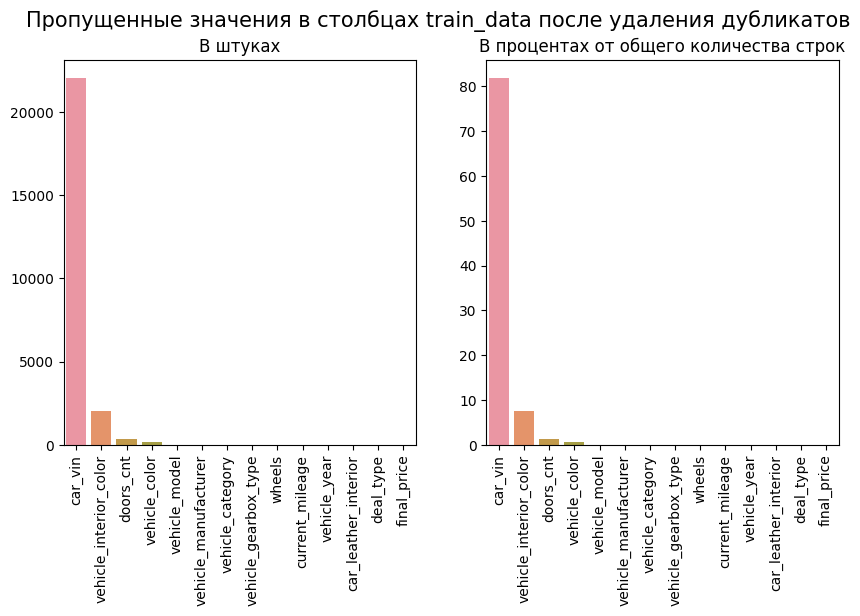

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
nulls_pct = nulls / train_data.shape[0] * 100
sns.barplot(y = nulls, x = nulls.index, ax=ax[0])
ax[0].set_title('В штуках')
sns.barplot(y = nulls_pct, x = nulls_pct.index, ax=ax[1])
ax[1].set_title('В процентах от общего количества строк')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.suptitle('Пропущенные значения в столбцах train_data после удаления дубликатов', fontsize=15);


Выводы:
1. Видим, что лидером по пропущенным значениям является свойство car_vin. Эти пропущенные значения не восстановить, но удалять более 80% данных не будем. При этом базовое решение показало, что этот признак находится на втором месте по важности для модели регрессии;
2. На втором месте идёт vehicle_interrior_color. Здесь пропусков значительно меньше. Пробуем вариант замены пропущенных значений ниболее часто встречающимся значением, то есть модой;
3. Следом идет признак количества дверей doors_cnt. По своей сути этот признак является категориальным и пропущенные значения также заменим на моду;
4. С vehicle_color поступим аналогично doors_cnt;
5. А вот строки с пропущенными данными в принаке vehicle_model можно попробовать восстановить по VIN, если в таких строках он присутствует;
6. Вполне вероятно, что после выполнения шагов 1-5 проблемы с пропущенными значениями в признаках vehicle_manufacturer, vehicle_category, vehicle_gearbox_type, wheels решатся за счет удаления соответствующих строк. Если нет, заполним пропуски модами. 

Нам предстоит часто заменять пропущенные значения модой. Следуя принципам DRY напишем для этого функцию:

In [9]:
def fillna_by_mode(df, column: str) -> None:
    """
    Filling missing values in 'feature' column of pandas.DataFrame df by
    most frequent value of this column (mode),
    prompt mission values count before and after filling,
    and make shure of there is no missing values after that.

    Args:
        df (pandas.DataFrame): Pandas DataFrame to fill missing values 
        column (str): Column name
    """
    
    # Report values counts
    print('Value counts:')
    print(df[column].value_counts())
    
    # Report missing values count before filling
    missing_cnt_before = df[column].isna().sum()
    print(f'Mising value counts: {missing_cnt_before}')
    
    # Find most frequent value (mode)
    mode = df[column].mode().values[0]
    
    # Fill missing values by most frequent value
    df[column].fillna(mode, inplace=True)
    
    # Report missing values count after filling
    missing_cnt_after = df[column].isna().sum()
    print(f'Mising value counts: {missing_cnt_after}')
    
    # Zero missing values check
    if missing_cnt_after:
        raise RuntimeError('Missing values count is not equal zero after pandas.Series.fillna!')
    else:
        print(f'Missing values of {column} was filled by mode value {mode} successfully!')


Для начала посмотрим на то, как представлены данные в колонке car_vin

In [10]:
train_data.car_vin.unique()

array([nan, ' KMHTC6AE3GU293912 ', ' JTNKHMBX7K1030253 ', ...,
       ' MAJ3P1TE3JC170090 ', ' KMHDH4AE2CU413977 ',
       ' 3FA6P0K98DR308742 '], dtype=object)

Видим, что VIN являются строками с пробелами в начале и в конце. Для экономии оперативной памяти, а также во избежание расхождений в данных из-за лишних пробелов удалим их для всех колонок с типом данных 'object'. Так как в некоторых колонках могут присутствовать пропуски, которые нужно оставить как есть для дальнейшего заполнения, напишем для этого специальную функцию, которая вдобавок приведет все строки к нижнем регистру:

In [11]:
def clear_string_value(value: str) -> str:
    """
    Remove heading and trailing spaces from value or return None if value is not str

    Args:
        value (str): input string with headinng and trailing spaces

    Returns:
        str: clear output sting or None
    """
    
    return value.strip().lower() if isinstance(value, str) else None

In [12]:
object_cols = train_data.select_dtypes('object').columns
for col in object_cols:
    train_data[col] = train_data[col].apply(clear_string_value)
    test_data[col] = test_data[col].apply(clear_string_value)

1. Заменим пропущенные значения в car_vin на 'no';

In [13]:
train_data.car_vin.isna().sum()

22040

In [14]:
train_data.car_vin.fillna('no', inplace=True)
train_data.car_vin.isna().sum()

0

2. Заменим пропущенные значения vehicle_interior_color модой

In [15]:
fillna_by_mode(train_data, 'vehicle_interior_color')

Value counts:
black            17765
grey              3349
beige             2003
white              723
brown              331
yellow             185
blue               177
golden             152
red                128
orange              62
carnelian red       46
Name: vehicle_interior_color, dtype: int64
Mising value counts: 2007
Mising value counts: 0
Missing values of vehicle_interior_color was filled by mode value black successfully!


3. Заменим пропущенные значения признака doors_cnt модой

In [16]:
fillna_by_mode(train_data, 'doors_cnt')

Value counts:
4/5    24827
2/3     1440
>5       291
Name: doors_cnt, dtype: int64
Mising value counts: 370
Mising value counts: 0
Missing values of doors_cnt was filled by mode value 4/5 successfully!


Видим, что наиболее популярным значением явлется 4/5 и эта запись видимо означает 4 двери для седанов, 4 двери и задняя дверь для хэтчбэков и универсалов. 

4. Так же поступаем с vehicle_color

In [17]:
fillna_by_mode(train_data, 'vehicle_color')

Value counts:
black            6461
white            6156
silver           5221
grey             3219
blue             2182
red              1014
green             567
carnelian red     360
brown             327
beige             275
orange            251
golden            246
sky blue          244
yellow            151
purple             62
pink               46
Name: vehicle_color, dtype: int64
Mising value counts: 146
Mising value counts: 0
Missing values of vehicle_color was filled by mode value black successfully!


5. Избавимся от пропусков в vehicle_model.

Для начала посмотрим какие вообще есть данные для записей с пропущенными значениями в этой колонке

In [18]:
train_data[train_data.vehicle_model.isna()]

,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type,final_price
6300,სხვა,None,universal,0,2007,tiptronic,2/3,left wheel,blue,black,no,1,for sale,2500.0
11796,honda,None,hatchback,168900,2012,automatic,4/5,right-hand drive,white,black,no,1,for sale,4200.0
14755,სხვა,None,limousine,400,2019,automatic,>5,left wheel,white,black,no,1,for sale,14500.0
17918,None,None,None,0,0,None,4/5,None,black,black,no,0,for sale,0.0
20642,jac,None,microbus,1000,2019,manual,4/5,left wheel,white,grey,no,1,for sale,22500.0
22563,სხვა,None,sedan,32895,1972,manual,4/5,left wheel,green,beige,no,0,for sale,1.0
32928,foton,None,sedan,100000,2001,manual,4/5,left wheel,green,golden,no,0,for sale,223.0


А вот это уже интересно! Итак наблюдаем:
1. В строке с индексом 17918 практически все данные отсутствуют и цена стоит нулевая. Такая информация точно не пригодится при обучении модели. Тут явный шум. Заодно видим, что в колонке final_price есть значения, выбивающиеся из общего ряда. Но это предмет для дальшейшей очистки данных от выбросов. А пока удалим эту строку.

In [19]:
train_data.drop([17918], axis='rows', inplace=True)

Посмотрим на строки с пропущенными моделями еще раз:

In [20]:
train_data[train_data.vehicle_model.isna()]


,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type,final_price
6300,სხვა,None,universal,0,2007,tiptronic,2/3,left wheel,blue,black,no,1,for sale,2500.0
11796,honda,None,hatchback,168900,2012,automatic,4/5,right-hand drive,white,black,no,1,for sale,4200.0
14755,სხვა,None,limousine,400,2019,automatic,>5,left wheel,white,black,no,1,for sale,14500.0
20642,jac,None,microbus,1000,2019,manual,4/5,left wheel,white,grey,no,1,for sale,22500.0
22563,სხვა,None,sedan,32895,1972,manual,4/5,left wheel,green,beige,no,0,for sale,1.0
32928,foton,None,sedan,100000,2001,manual,4/5,left wheel,green,golden,no,0,for sale,223.0


Видим странные записи с названием производтеля "სხვა". Быстрый поиск в сети показал, что это грузинский язык. А Google.Translate перевёл это слово на русский как "другой". Очень сомнительно, что настоящий автопроизводитель настолько локализуется, чтобы развивать бренд на грузинском языке, да еще и c названием, переводящимся на русский как "другой". Посмотрим на все записи в датасете с таким производителем:

In [21]:
strange_cars = train_data[train_data.vehicle_manufacturer == 'სხვა']
strange_cars

,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type,final_price
6300,სხვა,None,universal,0,2007,tiptronic,2/3,left wheel,blue,black,no,1,for sale,2500.0
8931,სხვა,lt103mcq1,pickup,500,2016,manual,4/5,left wheel,white,grey,no,0,for sale,12800.0
14755,სხვა,None,limousine,400,2019,automatic,>5,left wheel,white,black,no,1,for sale,14500.0
18638,სხვა,iamaha,coupe,123456,2017,automatic,2/3,left wheel,red,black,no,0,for sale,446.0
22563,სხვა,None,sedan,32895,1972,manual,4/5,left wheel,green,beige,no,0,for sale,1.0
31178,სხვა,iveco dayly,microbus,328000,2007,manual,4/5,left wheel,white,beige,no,0,for sale,8000.0


Обратим внимание на уникальные значения в колонке vehicle_model:

In [22]:
strange_cars_models = strange_cars.vehicle_model.unique()[1:]
strange_cars_models

array(['lt103mcq1', 'iamaha', 'iveco dayly'], dtype=object)

Посмотрим, а есть ли в базе записи с такими моделями, в которых указан производитель.

In [23]:
for strange_car_model in strange_cars_models:
    print(f'Unique manufacturers for model {strange_car_model}:')
    print(train_data[train_data['vehicle_model'] == strange_car_model]['vehicle_manufacturer'].unique())
    print()

Unique manufacturers for model lt103mcq1:
['სხვა']

Unique manufacturers for model iamaha:
['სხვა']

Unique manufacturers for model iveco dayly:
['სხვა']



Видим, что производитель у всех указан один, тот самый с грузинским названием, переводящимся как "другой".

Производителей по двум из этих записей можно восстановить:

Индекс 8931 модель LT103MCQ1 соответствует лёгкому грузовику от китайской компании Fude
Индекс 31178 название производителя следует из названия модели и это IVECO

Сделаем соответствующие замены в ручном режиме

In [24]:
train_data.loc[8931, 'vehicle_manufacturer'] = 'fude'
train_data.loc[31178, 'vehicle_manufacturer'] = 'iveco'


Посмотрим на то, что осталось:

In [25]:
strange_cars = train_data[train_data.vehicle_manufacturer == 'სხვა']
strange_cars


,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type,final_price
6300,სხვა,None,universal,0,2007,tiptronic,2/3,left wheel,blue,black,no,1,for sale,2500.0
14755,სხვა,None,limousine,400,2019,automatic,>5,left wheel,white,black,no,1,for sale,14500.0
18638,სხვა,iamaha,coupe,123456,2017,automatic,2/3,left wheel,red,black,no,0,for sale,446.0
22563,სხვა,None,sedan,32895,1972,manual,4/5,left wheel,green,beige,no,0,for sale,1.0


Запись с индексом 18638 выглядит очень странно по следующим причинам:
1. Название модели намекает на марку Yamaha, которая в автомобилестроении отличилась только спортивным трехдверным концептом, который в производсто и продажу не пошёл;
2. Очень сранный пробег раз-два-три-четыре-пять-шесть.

Удалим эту запись.

In [26]:
train_data.drop([18638], axis='rows', inplace=True)

Прежде, чем решать, что делать с оставшимися записями, давайте посмотрим, а есть ли записи с таким производителем в тестовом датасете:

In [27]:
test_data[test_data['vehicle_manufacturer'] == 'სხვა']


,row_ID,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type
4821,39821,სხვა,kamaz/ კამაზი,sedan,1000,2005,manual,2/3,right-hand drive,red,grey,None,0,for sale
8176,43176,სხვა,proton 415gli,sedan,200000,1994,manual,4/5,left wheel,silver,black,pl1c97lnlrb660581,0,for sale
9589,44589,სხვა,gonow,jeep,102000,2005,manual,4/5,left wheel,silver,beige,None,1,for sale


Видим:

1. Индекс 9589 - китайский производитель джипов GONOW;
2. Индекс 8176 - малайзиский производитель автомобилей PROTON;
3. Индекс 4821 - явный фейк от организаторов соревнования - седан от камаза (а через дробь тоже камаз, только на грузинском) да еще и купе. Если бы не год выпуска 2005, то можно было бы подумать на новый концепт электроавтомобиля от камаза для каршеринга, прогремевшего в недавних новостях. Но нет. Здесь нужно в предсказаниях явно ставить цену 0 в строке с индексом 4821.

Заменим производителей в этих строках:

In [28]:
test_data.loc[4821, 'vehicle_manufacturer'] = 'kamaz'
test_data.loc[8176, 'vehicle_manufacturer'] = 'proton'
test_data.loc[9589, 'vehicle_manufacturer'] = 'gonow'

Как видим, намечается предобработка как тренировочного, так и тестового датасетов. Но теперь записи со странным производителем остались только в тренировочном датасете. Таким образом можем смело удалить оставщиеся три странные записи.

In [29]:
strange_cars_idx = train_data[train_data.vehicle_manufacturer == 'სხვა'].index
train_data.drop(strange_cars_idx, axis='rows', inplace=True)


Да, немного отклонились, но по важному поводу. Самое время вернуться к признаку vehicle_model. Посмотрим на оставшиеся пропуски еще раз:

In [30]:
train_data[train_data.vehicle_model.isna()]


,vehicle_manufacturer,vehicle_model,vehicle_category,current_mileage,vehicle_year,vehicle_gearbox_type,doors_cnt,wheels,vehicle_color,vehicle_interior_color,car_vin,car_leather_interior,deal_type,final_price
11796,honda,None,hatchback,168900,2012,automatic,4/5,right-hand drive,white,black,no,1,for sale,4200.0
20642,jac,None,microbus,1000,2019,manual,4/5,left wheel,white,grey,no,1,for sale,22500.0
32928,foton,None,sedan,100000,2001,manual,4/5,left wheel,green,golden,no,0,for sale,223.0


Мы можем:
1. Удалить эти записи;
2. Заменить vehicle_model на UNKNOWN.

Какой подход лучше, можно выяснить только экспериментом. Для начала попробуем удалить. Только создадим копию данных.

In [31]:
train_data_copy = train_data.copy()
train_data.dropna(subset=['vehicle_model'], inplace=True)

In [32]:
train_data.vehicle_model.isna().sum()


0

6. Проверяем оставшиевся признаки на пропуски:

In [33]:
train_data.isna().sum()

vehicle_manufacturer      0
vehicle_model             0
vehicle_category          0
current_mileage           0
vehicle_year              0
vehicle_gearbox_type      0
doors_cnt                 0
wheels                    0
vehicle_color             0
vehicle_interior_color    0
car_vin                   0
car_leather_interior      0
deal_type                 0
final_price               0
dtype: int64

Ура, пропусков больше нет.

## III. Раздельный анализ признаков

### 1. Признак vehicle_manufacturer

Для начала переведем vehicle_manufacturer в категориальный тип

In [34]:
# train_data.vehicle_manufacturer = train_data.vehicle_manufacturer.astype('category')

Посмотрим на частоты упоминания производителей:

In [35]:
manu_counts = pd.DataFrame(train_data.vehicle_manufacturer.value_counts())
manu_counts.reset_index(drop=False, inplace=True)
manu_counts.columns=['vehicle_manufacturer', 'count']
manu_counts['pct'] = manu_counts['count'] / train_data.shape[0] * 100
manu_counts

,vehicle_manufacturer,count,pct
0,hyundai,4953,18.398960
1,toyota,4804,17.845468
2,mercedes-benz,2658,9.873700
3,ford,1842,6.842496
4,bmw,1602,5.950966
...,...,...,...
63,lancia,1,0.003715
64,fude,1,0.003715
65,mg,1,0.003715
66,tata,1,0.003715


Явных опечаток и отклонений в названиях производителей не наблюдаем. При этом видим перекос в данных в плане частот по производителям. Посмотрим на производителей, упомянутых не более 5 раз: 

In [36]:
display(manu_counts[manu_counts['count'] <= 5])
print(f'Количество производителей, упомянутых не более 5 раз: {(manu_counts["count"] <= 5).sum()}')

,vehicle_manufacturer,count,pct
50,mercury,5,0.018574
51,zaz,4,0.014859
52,moskvich,4,0.014859
53,hummer,4,0.014859
54,greatwall,3,0.011144
55,bentley,3,0.011144
56,pontiac,2,0.007429
57,aston martin,2,0.007429
58,rover,2,0.007429
59,saturn,2,0.007429


Количество производителей, упомянутых не более 5 раз: 18


Таких набралось немного, всего 18. Но это означает, что после разделения данных на тренировочную и тестовую выборки train_test_split такие записи  с высокой вероятностью попадут:
1. В тренировочную выборку и тогда мы обучимся только на одном примере, и точность предсказания модели по такому примеру не сможем оценить по тестовой выборке;
2. Либо в тестовую выборку, и тогда на таком примере мы вообще не обучимся.
Поэтому:

### !!! записи с частотами ниже 5 лучше вручную включить в обе выборки !!!

Посмотрим на анализ записей о продажах в разрезе производителя на графиках:

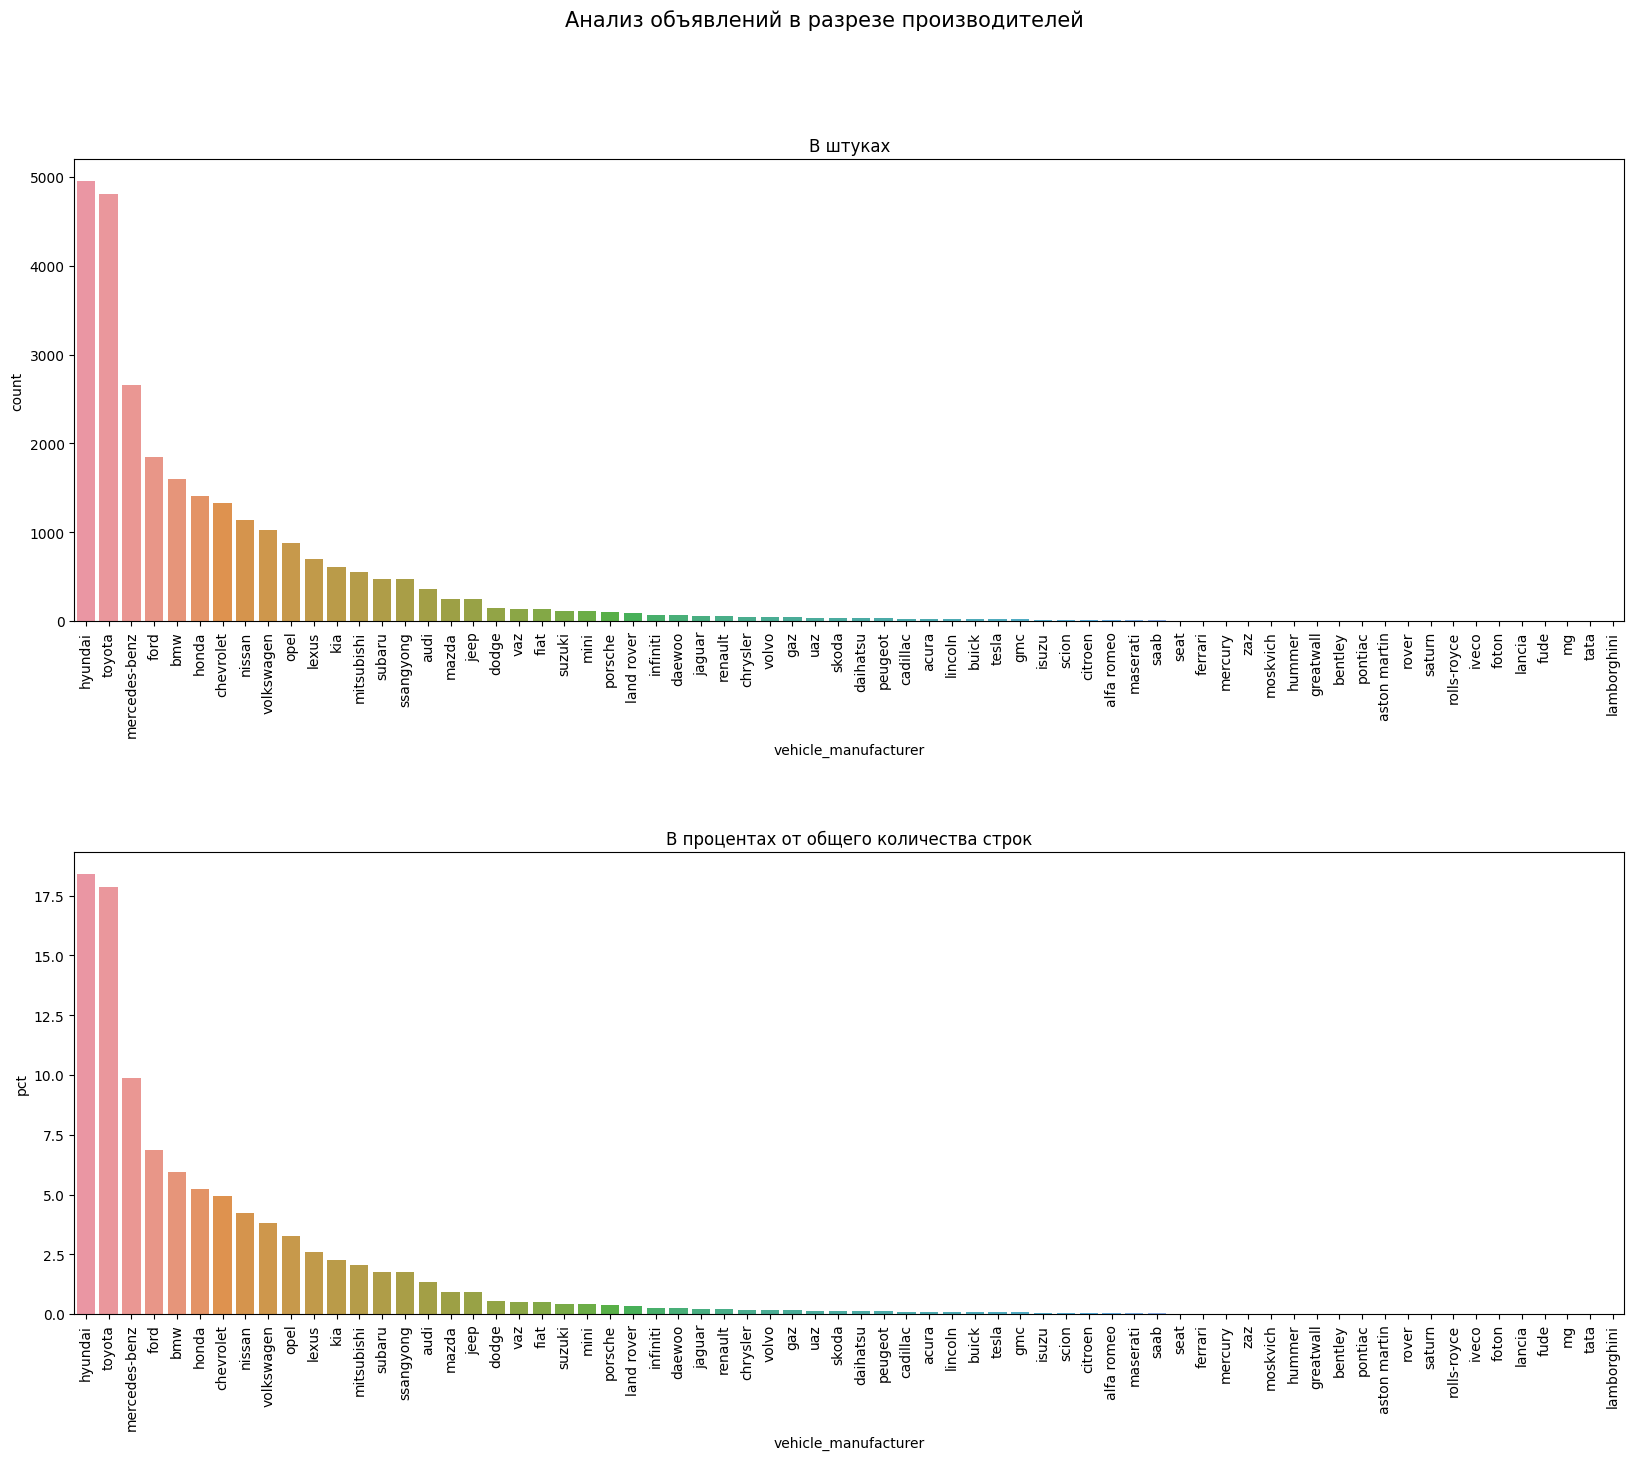

In [37]:
fig, ax = plt.subplots(2, 1, figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)
sns.barplot(data=manu_counts, x='vehicle_manufacturer', y='count', ax=ax[0])
ax[0].set_title('В штуках')
sns.barplot(data=manu_counts, x='vehicle_manufacturer', y='pct', ax=ax[1])
ax[1].set_title('В процентах от общего количества строк')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

fig.suptitle(
    'Анализ объявлений в разрезе производителей', fontsize=15);


Наблюдаем явный перекос в пользу Hyundai и Toyota.

2. Признак vehicle_model

Для примера посмотрим на названия моделей производителя Hyundai:

In [38]:
pd.set_option('display.max_rows', 500)
train_data[train_data['vehicle_manufacturer'] == 'hyundai']['vehicle_model'].value_counts()

sonata                   1229
elantra                  1081
tucson                   1000
santa fe                  774
h1                        318
veloster                  170
genesis                    85
accent                     66
i30                        38
grandeur                   28
elantra limited            21
sonata limited             13
sonata hybrid              10
elantra se                 10
elantra gt                  9
sonata sport                7
kona                        7
ix35                        6
veracruz                    6
tucson se                   4
azera                       4
getz                        4
accent se                   3
santa fe sport              3
galloper                    3
sonata se                   2
terracan                    2
i40                         2
lantra                      2
tucson limited              2
ioniq                       2
elantra limitedi            2
tucson 2.0                  1
elantra re

Видим:
1. Опечатки (h1 starixs, elantra ., elantra limitedi, lantra limited, tucson ix-20 - tucson ix 20 и т.п.);
2. Непонятные названия с дописками на грузинском языке (elantra კუპე);
3. Указание года в названии модели (sonata 2015);
4. Указание объема и типа двигателя (sonata 2.4l, tucson 2.0)
5. Что стоит разделить этот признак на 2 model и submodel, разделенные пробелом во всех случаях. Отдельную логику стоит прменить к модели santa fe.

Для перевода с грузинского можно использовать API Google.Translate, разделение на модель и модификацию тоже трудностей не представляет. А вот опечатки придётся оставить как есть, иначе такая работа, повторенная 68 раз для каждого производителя займёт неоправданно много времени.

Для начала переведём все, что на грузинском на английский язык. Для этого воспользуемся заранее подготовленным словарем (скрипт prepare_model_translate_dict.py)

In [39]:
test_data.vehicle_model.fillna('no', inplace=True)

In [40]:
import json

with open("models_dict.json") as f:
    models_dict = json.load(f)

In [41]:
len(models_dict)

2479

Применим этот словарь, чтобы избавиться от грузинского:

In [42]:
models_dict

{'aqua s': 'aqua s',
 'c 220': 'c 220',
 'veloster': 'Veloster',
 'santa fe': 'santa fe',
 'chr': 'chr',
 'delica': 'delica',
 'tucson': 'Tucson',
 'x5': 'x5',
 'aqua': 'aqua',
 '640': '640',
 'gle 350': 'gle 350',
 'juke': 'juke',
 'gx 470': 'gx 470',
 'focus': 'focus',
 'c 230': 'c 230',
 '2103': '2103',
 'q5': 'q5',
 'ct 200h f sport': 'ct 200h f sport',
 'tiida': 'tiida',
 'sonata': 'sonata',
 'golf': 'golf',
 'fit': 'fit',
 'camry': 'camry',
 'sprinter': 'sprinter',
 'highlander': 'highlander',
 'legacy': 'legacy',
 'cruze': 'cruze',
 'jetta': 'jetta',
 'transit': 'transit',
 'x6': 'x6',
 'elantra': 'elantra',
 'volt': 'volt',
 'fiesta': 'fiesta',
 'orlando': 'orlando',
 'gla 250': 'gl 250',
 'sprinter 316 cdi': 'sprinter 316 cdi',
 'pajero': 'Pajero',
 'spark': 'spark',
 'h1': 'h1',
 '1500': '1500',
 'yaris': 'Yaris',
 'ct 200h': 'ct 200h',
 'e 350': 'e 350',
 'vitz': 'vitz',
 'gx 460': 'gx 460',
 'rx 400': 'RX 400',
 'i': 'i',
 'impala': 'Impala',
 'tacoma': 'tacoma',
 'astra h'

In [43]:
train_data.vehicle_model = train_data.vehicle_model.map(models_dict)

In [44]:
test_data.vehicle_model = test_data.vehicle_model.map(models_dict)

In [45]:
train_data.vehicle_model.isna().sum()

0

In [46]:
test_data.vehicle_model.isna().sum()

0

После перевода посмотрим на модели производителя Hyundai еще раз:

In [47]:
train_data[train_data['vehicle_manufacturer'] == 'hyundai']['vehicle_model'].value_counts()

sonata                   1229
elantra                  1081
Tucson                   1000
santa fe                  774
h1                        318
Veloster                  170
genesis                    85
accent                     66
i30                        38
grandeur                   28
elantra limited            22
sonata limited             13
sonata hybrid              10
elantra se                 10
elantra gt                  9
sonata sport                7
Kona                        7
ix35                        6
veracruz                    6
tucson se                   4
Azera                       4
getz                        4
accent se                   3
tucson limited              3
galloper                    3
santa fe sport              3
terracan                    2
i40                         2
lantra                      2
ioniq                       2
sonata se                   2
elantra limitedi            2
kona sel                    1
Elantra 10

Применим к моделям созданную ранее функцию clear_string_value

In [48]:
train_data.vehicle_model = train_data.vehicle_model.apply(clear_string_value)

И посмотрим на модели производителя Hyundai еще раз:

In [49]:
train_data[train_data['vehicle_manufacturer']
            == 'hyundai']['vehicle_model'].value_counts()


sonata                   1229
elantra                  1081
tucson                   1000
santa fe                  774
h1                        318
veloster                  170
genesis                    85
accent                     66
i30                        38
grandeur                   28
elantra limited            22
sonata limited             13
sonata hybrid              10
elantra se                 10
elantra gt                  9
sonata sport                7
kona                        7
ix35                        6
veracruz                    6
tucson se                   4
azera                       4
getz                        4
accent se                   3
tucson limited              3
galloper                    3
santa fe sport              3
terracan                    2
i40                         2
lantra                      2
ioniq                       2
sonata se                   2
elantra limitedi            2
kona sel                    1
elantra 10

urgently - означает срочно. То есть в нашем случае в название модели затесалась декларация о срочной продаже. Уберем urgently везде, где бы оно не встретилось:

In [50]:
train_data.vehicle_model = train_data.vehicle_model.apply(lambda x: x.replace(' urgently', ''))

Приведем названия моделей тренировочного датасета к стандартному справочнику моделей.
Благодарность за датасет марок и моделей автомобилей Andrey Sol. Датасет взят <a href="https://github.com/blanzh/carsBase/blob/master/cars.csv">здесь</a>!

In [51]:
manufacturers_models = pd.read_csv('cars.csv', sep=';')

Применим очистку текста

In [52]:
manufacturers_models.model = manufacturers_models.model.apply(clear_string_value)
manufacturers_models.mark = manufacturers_models.mark.apply(clear_string_value)

In [53]:
manufacturers_models.head()

,mark,model
0,ac,378 gt zagato
1,ac,ace
2,ac,aceca
3,ac,cobra
4,acura,cl


In [54]:
import difflib

In [55]:
def get_best_match_model(manufacturer: str, model: str) -> str:
    """
    Return best match model from car models base, or itself if not found

    Args:
        manufacturer (str): manufacturer name in lower case without heading and trailing spaces
        model (str): model name (can be with typos)

    Returns:
        str: best match model or itself if not found
    """
    
    vehicle_models = manufacturers_models[manufacturers_models.mark == manufacturer].model.unique()
    
    if best_match_models := difflib.get_close_matches(model, vehicle_models):
        return best_match_models[0].strip().lower()
    
    return model


In [56]:
train_data.vehicle_model = train_data[['vehicle_manufacturer', 'vehicle_model']].apply(lambda x: get_best_match_model(
    x['vehicle_manufacturer'],
    x['vehicle_model']
), axis=1)

In [57]:
train_data[train_data['vehicle_manufacturer'] == 'hyundai']['vehicle_model'].value_counts()

sonata                   1269
elantra                  1082
tucson                   1011
santa fe                  778
h-1                       318
veloster                  173
genesis                    85
accent                     69
elantra n                  52
i30                        38
grandeur                   28
kona                        7
veracruz                    6
ix35                        6
azera                       4
getz                        4
galloper                    3
lantra                      2
i40                         2
ioniq                       2
terracan                    2
grand starex                1
i20                         1
kona n                      1
sonata brillianti           1
elantra sport limited       1
sonata sport limited        1
tiburon                     1
i10                         1
elantra gls/limited         1
coupe                       1
sonata blue edition         1
staria                      1
Name: vehi

Вот это уже результат, с которым можно обучать модель.

3. Признак vehicle_cetogory

Посмотрим на уникальные значения и частоты в этом признаке

In [58]:
train_data.vehicle_category.value_counts()

sedan          11784
jeep            7207
hatchback       4461
minivan          875
coupe            858
microbus         553
universal        551
goods wagon      438
pickup           106
cabriolet         75
limousine         12
Name: vehicle_category, dtype: int64

Вроде бы всё прилично. Оставляем как есть

4. Признак current_mileage

Посмотрим на распределение этого признака

<AxesSubplot: xlabel='current_mileage', ylabel='Density'>

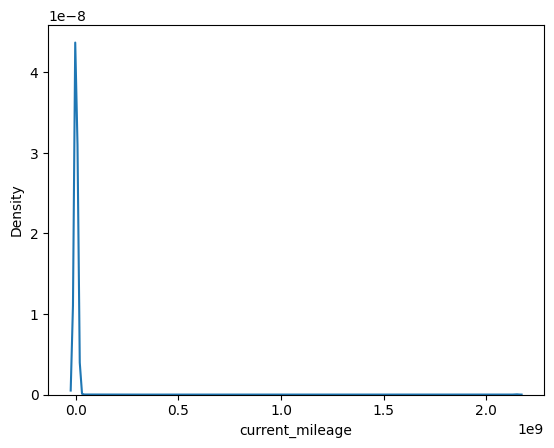

In [59]:
sns.kdeplot(data=train_data, x='current_mileage')

Видим сильное смещение. Посмотрим на ящик с усами на предмет выбросов:

<AxesSubplot: xlabel='current_mileage'>

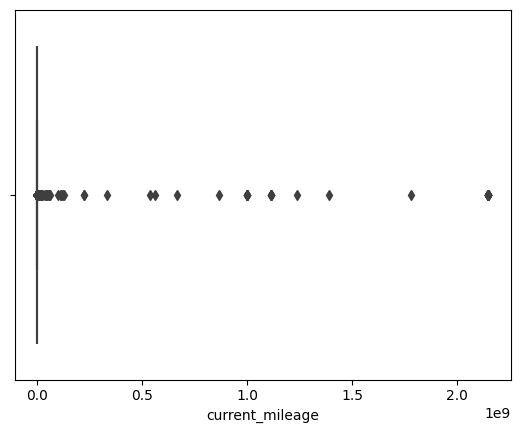

In [60]:
sns.boxplot(x = train_data.current_mileage)

Пробеги автомобилей, конечно, могут быть совершенно разными, но чтобы миллиарды км (или миль, что еще хуже) - это вряд ли. Из открытых источников видим, что абсолютный рекорд пробега автомобиля принадлежит Ирву Гордону, который на своем Volvo P1800, выпущенном в 1966 году, умудрился проехать более 4 800 000 км, а его автомобиля точно нет в базе. Поэтому будем считать, что максимально возможный пробег - 1 млн км. Изменим данные соответствующим образом.

In [61]:
train_data.current_mileage = train_data.current_mileage.apply(lambda x: min(x, 1_000_000))

In [62]:
train_data.current_mileage.describe()

count      26920.000000
mean      138238.219428
std       117547.676988
min            0.000000
25%        67985.500000
50%       123200.000000
75%       180278.750000
max      1000000.000000
Name: current_mileage, dtype: float64

Посмотрим, а сколько у нас записей, в которых пробег равен нулю

In [63]:
train_data[train_data.current_mileage == 0].current_mileage.count()

1091

Посмотрим на распределение этого признака теперь

<AxesSubplot: xlabel='current_mileage', ylabel='Density'>

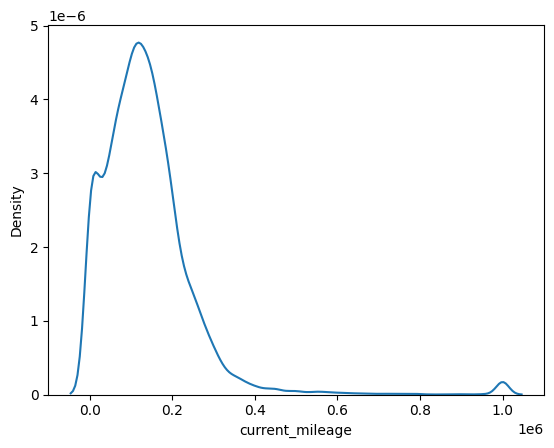

In [64]:
sns.kdeplot(data=train_data, x='current_mileage')

Распределение стало похоже на логнормальное. Но логарифмировать значения рано, пока есть нулевые значения. Заменим их на 1

In [65]:
train_data.current_mileage = train_data.current_mileage.apply(lambda x: x or 1)

In [66]:
train_data.current_mileage = np.log(train_data.current_mileage)

Посмотрим на распределение пробега теперь

<AxesSubplot: xlabel='current_mileage', ylabel='Density'>

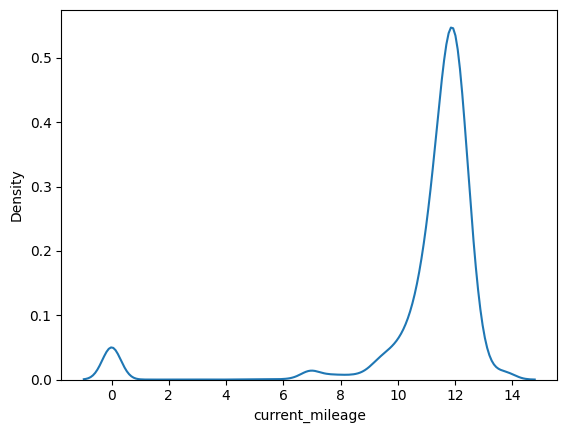

In [67]:
sns.kdeplot(data=train_data, x='current_mileage')


5. Признак vehicle_year

Посмотрим на распределение

<AxesSubplot: xlabel='vehicle_year', ylabel='Density'>

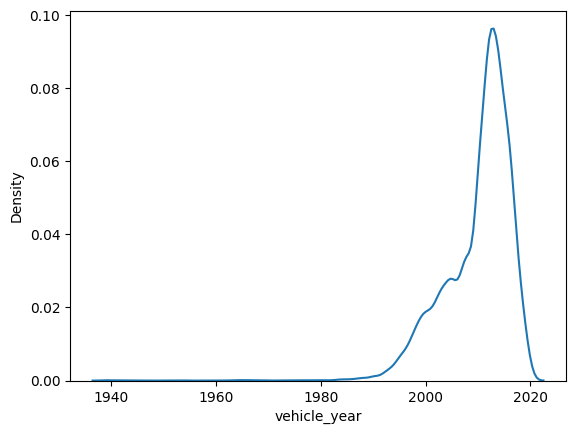

In [68]:
sns.kdeplot(data=train_data, x='vehicle_year')

Всё похоже на правду. Для лучшей интерпретации моделью предлагаю заменить vehicle_year признаком vehicle_age, рассчитанным как max(vehicle_year) - vehicle_year. Только максимальное значение года берем по тренировочному и тестовому датасетам

In [69]:
max_year = max(
    train_data.vehicle_year.max(),
    test_data.vehicle_year.max())

In [70]:
train_data['vehicle_age'] = train_data.vehicle_year.max() - train_data.vehicle_year

Удалим год

In [71]:
train_data.drop(columns=['vehicle_year'], inplace=True)

6. Признак vehicle_gearbox_type

Посмотрим на частоты

In [72]:
train_data.vehicle_gearbox_type.value_counts()

automatic    16244
tiptronic     5538
manual        3727
variator      1411
Name: vehicle_gearbox_type, dtype: int64

Все выглядит более чем правдоподобно. С этим признаком ничего делать не нужно

7. Признак doors_cnt.

Посмотрим на частоты:

In [73]:
train_data.doors_cnt.value_counts()

4/5    25192
2/3     1438
>5       290
Name: doors_cnt, dtype: int64

Посмотрим, как распределяются варианты с дверями для каждого из вариантов vehicle_category

In [74]:
for vehicle_category in train_data.vehicle_category.unique():
    print(f'Для типа кузова {vehicle_category} представлены такие частоты признака doors_cnt:')
    display(train_data[train_data.vehicle_category == vehicle_category].doors_cnt.value_counts())
    print('-'*80)

Для типа кузова sedan представлены такие частоты признака doors_cnt:


4/5    11592
2/3      127
>5        65
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова hatchback представлены такие частоты признака doors_cnt:


4/5    4282
2/3     153
>5       26
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова jeep представлены такие частоты признака doors_cnt:


4/5    6968
2/3     171
>5       68
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова coupe представлены такие частоты признака doors_cnt:


2/3    640
4/5    217
>5       1
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова universal представлены такие частоты признака doors_cnt:


4/5    531
2/3     11
>5       9
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова microbus представлены такие частоты признака doors_cnt:


4/5    362
2/3    146
>5      45
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова goods wagon представлены такие частоты признака doors_cnt:


4/5    326
2/3     91
>5      21
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова minivan представлены такие частоты признака doors_cnt:


4/5    798
>5      53
2/3     24
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова cabriolet представлены такие частоты признака doors_cnt:


2/3    53
4/5    22
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова pickup представлены такие частоты признака doors_cnt:


4/5    82
2/3    22
>5      2
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------
Для типа кузова limousine представлены такие частоты признака doors_cnt:


4/5    12
Name: doors_cnt, dtype: int64

--------------------------------------------------------------------------------


Посмотрим на автопроизводителей и марки моделей с более чем 5 дверями:

In [75]:
train_data[train_data.doors_cnt == '>5'][['vehicle_manufacturer', 'vehicle_model', 'vehicle_category']].head()

,vehicle_manufacturer,vehicle_model,vehicle_category
216,toyota,isis,minivan
383,ford,transit custom,microbus
618,bmw,507,sedan
619,volkswagen,caddy,pickup
757,mitsubishi,airtrek,jeep


In [76]:
train_data.vehicle_category.value_counts()

sedan          11784
jeep            7207
hatchback       4461
minivan          875
coupe            858
microbus         553
universal        551
goods wagon      438
pickup           106
cabriolet         75
limousine         12
Name: vehicle_category, dtype: int64

Странно для некоторых моделей видеть более 5 дверей (как пример bmw 507), но исправить это сложно. Будем считать, что максимальное количество дверей будет 6, а остальные варианты легко привести к конкретным числам по следующей логике:

* sedan, pickup, cabriolet могут иметь либо 2, либо 4, либо 6 дверей (здесь и далее это определяется признаком doors_cnt);
* jeep, hatchback, microbus, minivan, universal, goods wagon могут быть 3 либо 5, либо 7 дверными;
* limousine может быть только 4 дверным.

Реализуем эту логику в функции:



In [77]:
def get_doors_cnt(vehicle_category: str, doors_cnt: str) -> int:
    if vehicle_category == 'limousine':
        return 4
    
    if vehicle_category in {'sedan', 'pickup', 'cabriolet'}:
        if doors_cnt == '2/3':
            return 2
        if doors_cnt == '4/5':
            return 4
        return 6
    
    if doors_cnt == '2/3':
        return 3
    
    if doors_cnt == '4/5':
        return 5
    
    return 7
    

In [78]:
train_data.doors_cnt = train_data[['vehicle_category', 'doors_cnt']].apply(lambda x: get_doors_cnt(
    x['vehicle_category'],
    x['doors_cnt']), axis=1)

8. Признак wheels

In [79]:
train_data.wheels.value_counts()

left wheel          24163
right-hand drive     2757
Name: wheels, dtype: int64

Здесь все очень просто и логично. Это расположение руля: правое/левое. Тут менять ничего не требуется

9. Признак vehicle_color

In [80]:
train_data.vehicle_color.value_counts()


black            6606
white            6153
silver           5221
grey             3219
blue             2181
red              1013
green             565
carnelian red     360
brown             327
beige             275
orange            251
golden            246
sky blue          244
yellow            151
purple             62
pink               46
Name: vehicle_color, dtype: int64

Здесь все тоже логично и законно. Едем дальше...

10. Признак vehicle_interior_color

In [81]:
train_data.vehicle_interior_color.value_counts()

black            19767
grey              3348
beige             2002
white              723
brown              331
yellow             185
blue               177
golden             151
red                128
orange              62
carnelian red       46
Name: vehicle_interior_color, dtype: int64

И здесь тоже все логично и законно. Едем дальше

11. Признак car_vin

<a href="https://ru.wikipedia.org/wiki/%D0%98%D0%B4%D0%B5%D0%BD%D1%82%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BD%D0%BE%D0%BC%D0%B5%D1%80_%D1%82%D1%80%D0%B0%D0%BD%D1%81%D0%BF%D0%BE%D1%80%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B2%D0%B0">Отсюда</a> видим, что из VIN номера можно извлечь важную информацию о стране производства автомобиля. Это первые три символа. Причем для задач машинного обучения нам не требуется даже переводить их в понятное для человека название страны. Мы просто получаем дополнительную информацию, которая может положительно повлиять на прогноз цены автомобиля. Также интересен 10-й символ VIN-кода определяющий модельный год автомобиля согласно таблице:
<table class="wikitable">
<tbody><tr>
<th>Код</th>
<th>Год</th>
<th></th>
<th>Код</th>
<th>Год</th>
<th></th>
<th>Код</th>
<th>Год</th>
<th></th>
<th>Код</th>
<th>Год</th>
<th></th>
<th>Код</th>
<th>Год</th>
<th></th>
<th>Код</th>
<th>Год
</th></tr>
<tr>
<td>A =</td>
<td>1980</td>
<td></td>
<td>L =</td>
<td>1990</td>
<td></td>
<td>Y =</td>
<td>2000</td>
<td></td>
<td>A =</td>
<td>2010</td>
<td></td>
<td>L =</td>
<td>2020</td>
<td></td>
<td>Y =</td>
<td>2030
</td></tr>
<tr>
<td>B =</td>
<td>1981</td>
<td></td>
<td>M =</td>
<td>1991</td>
<td></td>
<td>1 =</td>
<td>2001</td>
<td></td>
<td>B =</td>
<td>2011</td>
<td></td>
<td>M =</td>
<td>2021</td>
<td></td>
<td>1 =</td>
<td>2031
</td></tr>
<tr>
<td>C =</td>
<td>1982</td>
<td></td>
<td>N =</td>
<td>1992</td>
<td></td>
<td>2 =</td>
<td>2002</td>
<td></td>
<td>C =</td>
<td>2012</td>
<td></td>
<td>N =</td>
<td>2022</td>
<td></td>
<td>2 =</td>
<td>2032
</td></tr>
<tr>
<td>D =</td>
<td>1983</td>
<td></td>
<td>P =</td>
<td>1993</td>
<td></td>
<td>3 =</td>
<td>2003</td>
<td></td>
<td>D =</td>
<td>2013</td>
<td></td>
<td>P =</td>
<td>2023</td>
<td></td>
<td>3 =</td>
<td>2033
</td></tr>
<tr>
<td>E =</td>
<td>1984</td>
<td></td>
<td>R =</td>
<td>1994</td>
<td></td>
<td>4 =</td>
<td>2004</td>
<td></td>
<td>E =</td>
<td>2014</td>
<td></td>
<td>R =</td>
<td>2024</td>
<td></td>
<td>4 =</td>
<td>2034
</td></tr>
<tr>
<td>F =</td>
<td>1985</td>
<td></td>
<td>S =</td>
<td>1995</td>
<td></td>
<td>5 =</td>
<td>2005</td>
<td></td>
<td>F =</td>
<td>2015</td>
<td></td>
<td>S =</td>
<td>2025</td>
<td></td>
<td>5 =</td>
<td>2035
</td></tr>
<tr>
<td>G =</td>
<td>1986</td>
<td></td>
<td>T =</td>
<td>1996</td>
<td></td>
<td>6 =</td>
<td>2006</td>
<td></td>
<td>G =</td>
<td>2016</td>
<td></td>
<td>T =</td>
<td>2026</td>
<td></td>
<td>6 =</td>
<td>2036
</td></tr>
<tr>
<td>H =</td>
<td>1987</td>
<td></td>
<td>V =</td>
<td>1997</td>
<td></td>
<td>7 =</td>
<td>2007</td>
<td></td>
<td>H =</td>
<td>2017</td>
<td></td>
<td>V =</td>
<td>2027</td>
<td></td>
<td>7 =</td>
<td>2037
</td></tr>
<tr>
<td>J =</td>
<td>1988</td>
<td></td>
<td>W =</td>
<td>1998</td>
<td></td>
<td>8 =</td>
<td>2008</td>
<td></td>
<td>J =</td>
<td>2018</td>
<td></td>
<td>W =</td>
<td>2028</td>
<td></td>
<td>8 =</td>
<td>2038
</td></tr>
<tr>
<td>K =</td>
<td>1989</td>
<td></td>
<td>X =</td>
<td>1999</td>
<td></td>
<td>9 =</td>
<td>2009</td>
<td></td>
<td>K =</td>
<td>2019</td>
<td></td>
<td>X =</td>
<td>2029</td>
<td></td>
<td>9 =</td>
<td><a href="/wiki/2039" class="mw-redirect" title="2039">2039</a>
</td></tr></tbody></table>

https://ru.wikipedia.org/wiki/%D0%98%D0%B4%D0%B5%D0%BD%D1%82%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BD%D0%BE%D0%BC%D0%B5%D1%80_%D1%82%D1%80%D0%B0%D0%BD%D1%81%D0%BF%D0%BE%D1%80%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D1%81%D1%80%D0%B5%D0%B4%D1%81%D1%82%D0%B2%D0%B0

Однако для выделения страны производителя и модельного года нам удобней будет воспользоваться готовой библиотекой <a href="https://github.com/nighcoder/vin-parser">vin-parser</a>.

А перед этим проверим, что у нас было в столбце car_vin плохого кроме пропущенных значений:

In [82]:
sorted(list(train_data.car_vin.unique()), key=len)

['5',
 '0',
 '.',
 'წ',
 '1',
 'o',
 'no',
 'an',
 '12',
 'dd',
 'tt',
 'un',
 '00',
 '000',
 '111',
 'www',
 '123',
 '...',
 'gio',
 '333',
 'uhh',
 '1234',
 '1111',
 '3330',
 'otar',
 'tyuu',
 '1010',
 '4444',
 '9999',
 '5646',
 'fdgg',
 '2600',
 'wcw5',
 '6547',
 'kafg',
 '7657',
 '2198',
 '121w',
 '1221',
 '1717',
 '11111',
 '12345',
 '45785',
 '69tfj',
 'xnxnd',
 'euro4',
 '00000',
 'astra',
 'xachi',
 '90000',
 '25786',
 '55555',
 'ooooo',
 'fhkbhj',
 '111111',
 'thbdjs',
 '122235',
 '......',
 'hhbkbh',
 '234327',
 'guvffy',
 'hshshs',
 '701707',
 'ipi648',
 'wfolxx',
 '1234544',
 '66ggfd8',
 'lt75116',
 '5784336',
 'hehshsh',
 '135gfjjf',
 'vr234678',
 '22222222',
 '78864588',
 'w111111w',
 '99991578',
 '4132e889',
 'suratshi',
 'rr-685mm',
 'bv3492708',
 'am5618651',
 'ze0001246',
 'av3021076',
 '123456789',
 '599979594',
 'sf5158747',
 'am5564435',
 '123455689',
 'am5702559',
 'bv3215308',
 '599429041',
 '598979593',
 'am3514338',
 'ov1426437',
 'rv0754115',
 'ffi64rfhb',
 'b

Видим необходимость контроля длины VIN-кода

In [83]:
import vin_parser as vp
train_data.car_vin

0                       no
1                       no
2        kmhtc6ae3gu293912
3                       no
4        jtnkhmbx7k1030253
               ...        
34994                   no
34995    3fa6p0k98dr308742
34996                   no
34997                   no
34999                   no
Name: car_vin, Length: 26920, dtype: object

In [84]:
def get_country(vin: str):
    if vin == 'no' or len(vin) != 17:
        return 'no'
    country = vp.country(vin)
    return 'no' if country is None else country


In [85]:
train_data['manuf_country'] = train_data.car_vin.apply(get_country)

Посмотрим на новый признак:

In [86]:
train_data.manuf_country.value_counts()

no                22201
United States      1553
Japan              1313
Germany             831
Mexico              424
South Korea         338
Canada              156
Turkey               40
United Kingdom       31
Italy                12
Sweden                3
France                3
China                 3
India                 3
Austria               2
Czech Republic        2
unassigned            1
Thailand              1
Poland                1
Russia                1
Spain                 1
Name: manuf_country, dtype: int64

Видно, что с ним вполне можно поработать

Добавим признак модельного года:

In [87]:
def get_model_year(vin: str) -> int:
    if vin == 'no' or len(vin) != 17:
        return 0
    year = vp.year(vin)
    return 0 if year is None else year

In [88]:
train_data['model_year'] = train_data.car_vin.apply(get_model_year)

In [89]:
train_data.model_year.value_counts()

0       22223
2013      706
2014      624
2012      574
2015      470
2016      426
2011      398
2017      375
2010      295
2018      234
2019      175
2008      154
2009       92
2007       37
2001       34
2006       20
2020       17
2005       15
2002       13
2004       13
2003        6
1997        4
1998        3
1995        3
1999        3
2000        2
2022        1
1994        1
1996        1
2023        1
Name: model_year, dtype: int64

Теперь можно удалить исходный признак car_vin

In [90]:
train_data.drop(columns=['car_vin'], inplace=True)

11. Признак car_leather_interrior

In [91]:
train_data.car_leather_interior.value_counts()

1    17020
0     9900
Name: car_leather_interior, dtype: int64

Видим бинарный признак того, что салон кожанный. С ним всё в порядке. Едем дальше.

12. Признак deal_type

In [92]:
train_data.deal_type.value_counts()

for sale    26319
for rent      601
Name: deal_type, dtype: int64

Видим два варианта, которые означают:
1. for sale - на продажу;
2. for rent - для сдачи в аренду.

Странно, зачем в базе автомобилей на продажу затесались записи про аренду.

Посмотрим, а есть ли такие же записи про аренду в тестовом датасете:

In [93]:
test_data.deal_type.value_counts()

for sale    10526
for rent      171
Name: deal_type, dtype: int64

Видим, что есть. Из этого делаем вывод, что задача сформулирована не точно и мы создаём модель предсказания не только стоимости продажи, но и стоимости аренды автомобиля.

Для пущей уверенности посмотрим на распределение цен в этих категориях:

In [94]:
train_data.groupby('deal_type').final_price.describe()

,count,mean,std,min,25%,50%,75%,max
deal_type,,,,,,,,
for rent,601.0,243.279534,1400.632065,0.0,13.0,19.0,32.0,19000.0
for sale,26319.0,7021.370303,84593.071683,0.0,2500.0,4600.0,7500.0,8388607.0


Убеждаемся в правильности своих выводов, отсутствии пропусков и сохраняем полученный крутейший тренировочный датасет, не забыв вернуть столбец row_ID.

In [95]:
train_data.isna().sum().sum()

0

In [96]:
train_data['row_ID'] = train_data.index
train_data.to_csv('train_data_preprocessed.csv')